# Comparing best model for each method (classifier)

We take the version (depending on the parameters) with highest score for ACC and AUROC for each classifier to compare them and choose the best one.


Input specific libraries for the calculations:


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import os

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process.kernels import RBF
from sklearn.svm import LinearSVC

from sklearn import metrics
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
import seaborn as sns


### Importing data

Reading dataset and importing variables from previous file:

In [2]:
# Read tr and ts datasets
df_tr_norm = pd.read_csv(r'datasets\ds.Class.tr.norm.csv')
df_ts_norm = pd.read_csv(r'datasets\ds.Class.ts.norm.csv')
print('Training shape:',df_tr_norm.shape)
print('Test shape:',df_ts_norm.shape)

outVar = 'Class'
seed = 42  # Always the same split

X_tr_norm = df_tr_norm.drop(outVar, axis=1).values
y_tr_norm = df_tr_norm[outVar].values
X_ts_norm = df_ts_norm.drop(outVar, axis=1).values
y_ts_norm = df_ts_norm[outVar].values

class_weights = {0: 1.7268048407288914, 1: 0.703781393503033}
priors = [0.7104478814241985, 0.2895521185758015]  # Priors calculated for LDA

Training shape: (24828, 26)
Test shape: (6207, 26)


### Comparing statistically the best model of each method

Define the list of the selected model for each method to compare them in a plot:

In [3]:

classifiers = [
{
    'label': 'DecisionTree','tag':'DT',
    'model': DecisionTreeClassifier(random_state=seed,class_weight=class_weights, max_depth=8),
},
{
    'label': 'GaussianNB','tag':'Gau',
    'model': GaussianNB(),
},
{
    'label': 'KNeighbors','tag':'KNN',
    'model': KNeighborsClassifier(n_jobs=-1, n_neighbors=7),
},
{
    'label': 'LinearDiscrim','tag':'LD',
    'model':LinearDiscriminantAnalysis(solver='svd',priors=priors),
},
{
    'label': 'LogRegression','tag':'LR',
    'model': LogisticRegression(solver='newton-cg',random_state=seed,class_weight=class_weights),
},
{
    'label': 'MLPClassifier','tag':'MLP',
    'model': MLPClassifier(hidden_layer_sizes= (50), random_state = seed, max_iter=200, shuffle=False),
},
{
    'label': 'RandomForest','tag':'RF',
    'model': RandomForestClassifier(n_estimators=500,n_jobs=-1,random_state=seed,class_weight=class_weights),
},
{
    'label': 'LinearSVM','tag':'L-SVM',
    'model': SVC(kernel="linear",random_state=seed,class_weight=class_weights,probability=True),
},
{
    'label': 'RBF SVM','tag':'R-SVM',
    'model': SVC(kernel='rbf', random_state=seed,gamma='scale',class_weight=class_weights,probability=True),
}
]


Defining a dataframe with ACC and AUROC for each classifier:

In [4]:
df_table = pd.DataFrame(columns=['Method','ACC','AUROC'])

Calculate statistics to write them on the dataframe and display on the plot to make the comparison:

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


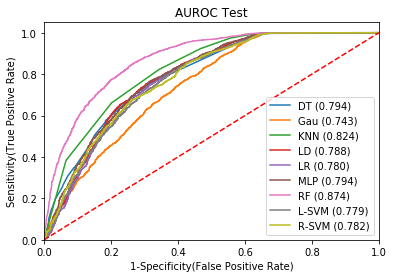

In [5]:
# Defining the AUROC comparison plot
plt.figure() 

# Itering through models list
for m in classifiers:
    cls = m['model'] 
    cls.fit(X_tr_norm, y_tr_norm)

    y_pred  = cls.predict(X_ts_norm)
    y_probs = cls.predict_proba(X_ts_norm)[:, 1]

# Calculate different methrics to display on the plot
    fpr, tpr, thresholds = metrics.roc_curve(y_ts_norm,y_probs)
    acc = accuracy_score(y_ts_norm, y_pred)
    auc = roc_auc_score(y_ts_norm, y_probs)
    
# Adding the results on the table
    df_table = df_table.append({'Method': m['label'],
                          'ACC': float(acc),
                          'AUROC': float(auc)}, ignore_index=True)

# Plot the computed values
    plt.plot(fpr, tpr, label='%s (%0.3f)' % (m['tag'], auc))

# Custom plot settings
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('AUROC Test')
plt.legend(loc="lower right")
plt.show()

Saving the dataframe of the results:

In [6]:
df_table

,Method,ACC,AUROC
0,DecisionTree,0.733366,0.794382
1,GaussianNB,0.724827,0.742730
2,KNeighbors,0.810375,0.823575
3,LinearDiscrim,0.639923,0.787749
4,LogRegression,0.768326,0.779788
5,MLPClassifier,0.810859,0.793581
6,RandomForest,0.842597,0.873812
7,LinearSVM,0.784115,0.778672
8,RBF SVM,0.760754,0.781718


In [ ]:
df_table.to_csv(r'results\ML_best_auroc_acc.csv',index=False)

Reading results of the dataframe:

In [7]:
df_table = pd.read_csv(r'results\ML_best_auroc_acc.csv')

Defining the ACC and AUROC comparison plot:

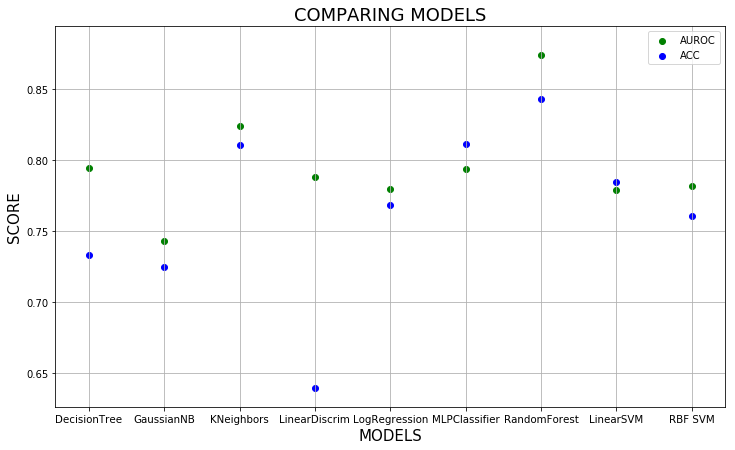

In [8]:
# Custom settings for the plot 
plt.figure(figsize=(12,7,))
plt.title('COMPARING MODELS',fontsize=18)
x = "Method"
y1 = "AUROC"
y2 = "ACC"
plt.scatter(x,y1,data=df_table,color = 'g', label = 'AUROC')
plt.scatter(x,y2,data=df_table, color = 'b', label = 'ACC')
plt.xticks(fontsize=10.25)
plt.xlabel('MODELS',fontsize=15)
plt.ylabel('SCORE',fontsize=15)
plt.legend()
plt.grid()
plt.show()
#plt.savefig(r'results\Comparing_auroc_acc.png')  # Saving the plot

..........